In [72]:
import re
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy
import datetime as dt
import fsspec
plt.rcParams['figure.figsize'] = (16,8)

### According to the paper:Characteristics of Surface Solar Radiation under Different Air Pollution Conditions over Nanjing, China: Observation and Simulation,PM 2.5 increases scattered radiation the most among particle matters in different size and affects the surface solar radiation (global radiation at surface).

In [14]:
# url_base='https://opendap.larc.nasa.gov/opendap/CERES/SSF1deg-Day/Aqua-MODIS_Edition4A/2019/01/CER_SSF1deg-Day_Aqua-MODIS_Edition4A_404405.2019'
# url_base_1='https://opendap.larc.nasa.gov/opendap/CERES/SSF1deg-Day/Aqua-MODIS_Edition4A/2019/01/CER_SSF1deg-Day_Aqua-MODIS_Edition4A_404406.2019'
# url_list=[]
# start_p = re.search('Edition4A/2019/', url_base).span()[1]
# end_p = start_p + 2
# for i in np.arange(1,13,1):
#     if i < 12:
#         url_list.append('%s%02.0f.hdf'%(url_base,i))
#     else:
#         url_list.append('%s%02.0f.hdf'%(url_base,i))
#     list_str = url_list[i-1]
#     url_list[i-1] = list_str[:start_p] + ("0" + str(i) if i < 10 else str(i)) + list_str[end_p:]
# url_list


# #generate a list of url for everyday link in Jan 2019
# url_base='https://opendap.larc.nasa.gov/opendap/CERES/SYN1deg-Day/Terra-Aqua-MODIS_Edition4A/2019/01/CER_SYN1deg-Day_Terra-Aqua-MODIS_Edition4A_407406.201901'
# urls=[]
# for i in np.arange(1,32,1):
#     urls.append('%s%02.0f.hdf'%(url_base,i))
# urls

['https://opendap.larc.nasa.gov/opendap/CERES/SYN1deg-Day/Terra-Aqua-MODIS_Edition4A/2019/01/CER_SYN1deg-Day_Terra-Aqua-MODIS_Edition4A_407406.20190101.hdf',
 'https://opendap.larc.nasa.gov/opendap/CERES/SYN1deg-Day/Terra-Aqua-MODIS_Edition4A/2019/01/CER_SYN1deg-Day_Terra-Aqua-MODIS_Edition4A_407406.20190102.hdf',
 'https://opendap.larc.nasa.gov/opendap/CERES/SYN1deg-Day/Terra-Aqua-MODIS_Edition4A/2019/01/CER_SYN1deg-Day_Terra-Aqua-MODIS_Edition4A_407406.20190103.hdf',
 'https://opendap.larc.nasa.gov/opendap/CERES/SYN1deg-Day/Terra-Aqua-MODIS_Edition4A/2019/01/CER_SYN1deg-Day_Terra-Aqua-MODIS_Edition4A_407406.20190104.hdf',
 'https://opendap.larc.nasa.gov/opendap/CERES/SYN1deg-Day/Terra-Aqua-MODIS_Edition4A/2019/01/CER_SYN1deg-Day_Terra-Aqua-MODIS_Edition4A_407406.20190105.hdf',
 'https://opendap.larc.nasa.gov/opendap/CERES/SYN1deg-Day/Terra-Aqua-MODIS_Edition4A/2019/01/CER_SYN1deg-Day_Terra-Aqua-MODIS_Edition4A_407406.20190106.hdf',
 'https://opendap.larc.nasa.gov/opendap/CERES/SYN1de

In [ ]:
# #open the whole month data as one dataset (takes too much time?)
# ds=open_mfdataset(urls,engine='pydap')
## how to add datetime to each varaible?
## how to only select certain variables when opening the dataset?
# ds_sfc=[]
# for i in np.arange(1,32,1):
#     ds=xr.open_dataset(urls[i-1],engine='pydap')
#     ds=ds.adj_clr_sw_dn.sel(lat=slice(40,45),lon=slice(280,290))
#     ds=ds.assign_coords(date = dt.datetime(2019, 1, i))
#     ds_sfc.append(ds)   
#ds_sfc_merge=xr.merge(ds_sfc)

In [ ]:
# #assign datetime to data of interest on each day of month
# date_lst = []
# for i in range(len(ds['day_of_month'])):
#     date_lst.append(dt.datetime(2019, 1, ds['day_of_month'][i].values))

# ds.assign_coords(date = date_lst)

In [132]:
#Open monthly average surface radiation data from 2000 to 2018
ds=xr.open_dataset('https://opendap.larc.nasa.gov/opendap/CERES/EBAF/Surface_Edition4.0/CERES_EBAF-Surface_Edition4.0_200003-201803.nc',engine='pydap')

In [ ]:
# lr=ds_2017['sfc_net_lw_clr_mon']
# tr=ds_2017['sfc_net_tot_clr_mon']
# lon=ds_2017['lon']
# lat=ds_2017['lat']
# time=ds_2017['time']
# ds_sfc=xr.Dataset(data_vars={'lw_rad':(('lon','lat','time'),lr),
#                              'tot_rad':(('lon','lat','time'),tr)},
#                  coords={'lon':lon,'lat':lat,'time':time})
# ds_sfc

In [180]:
#Only collect downward shortwave flux in 2017. Choose clear sky condition to avoid the effects of clouds. 
# *** Need to compute diffuse fraction (diffuse/global radiation) rather than use the downward shortwave radiation directy (global radiation) 
# --> need to add diffuse/direct radiation data from other dataset! (diffuse+direct = global = total downward shortwave radiation)
#Right now it's only global
ds_2017=ds['sfc_sw_down_clr_mon'].sel(time='2017')
ds_2017

<xarray.DataArray 'sfc_sw_down_clr_mon' (time: 12, lat: 180, lon: 360)>
[777600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2017-01-15 2017-02-15 ... 2017-12-15
Attributes:
    long_name:      Surface Shortwave Flux Down, Monthly Means, Clear-Sky con...
    standard_name:  Surface Shortwave Flux Down - Clear-Sky
    CF_name:        surface_downwelling_shortwave_flux_in_air_assuming_clear_sky
    units:          W m-2
    valid_min:            0.00000
    valid_max:            520.000

In [160]:
# mean_lw=ds_2017['sfc_net_lw_clr_mon'].mean(dim='time')
# mean_tot=ds_2017['sfc_net_tot_clr_mon'].mean(dim='time')

In [161]:
# #calculate mean diffuse fraction in 2017
# ds_frac = mean_lw/mean_tot
# ds_frac

In [179]:
#Calculate mean downward shortwave solar radiation in 2017
ds_sfcrad_mean = ds_2017.mean(dim='time')
ds_sfcrad_mean

<xarray.DataArray 'sfc_sw_down_clr_mon' (lat: 180, lon: 360)>
array([[146.105  , 146.105  , 146.105  , ..., 146.105  , 146.105  ,
        146.105  ],
       [145.99887, 145.99887, 145.99887, ..., 145.99887, 145.99887,
        145.99887],
       [146.13574, 146.13574, 146.13574, ..., 146.13574, 146.13574,
        146.13574],
       ...,
       [125.10455, 125.10455, 125.10455, ..., 125.10455, 125.10455,
        125.10455],
       [125.22049, 125.22049, 125.22049, ..., 125.22049, 125.22049,
        125.22049],
       [125.36225, 125.36225, 125.36225, ..., 125.36225, 125.36225,
        125.36225]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

Text(0.5, 1.0, 'Average clear-sky direct surface solar radiation in 2017')

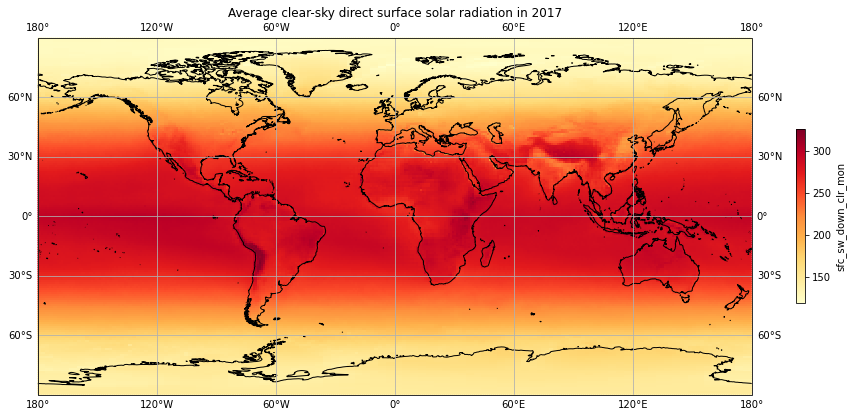

In [163]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0, globe=None))
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='50m')

ds_sfcrad_mean.plot(cmap='YlOrRd',vmin=np.min(ds_sfcrad_mean.values), vmax=np.max(ds_sfcrad_mean.values),transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.4})
plt.title('Average clear-sky direct surface solar radiation in 2017')
#plt.colorbar(shrink=0.4,label='Surface shorwave flux in W/m^2')?

Text(0.5, 1.0, 'Average clear-sky direct surface solar radiation in 2017 (New York State)')

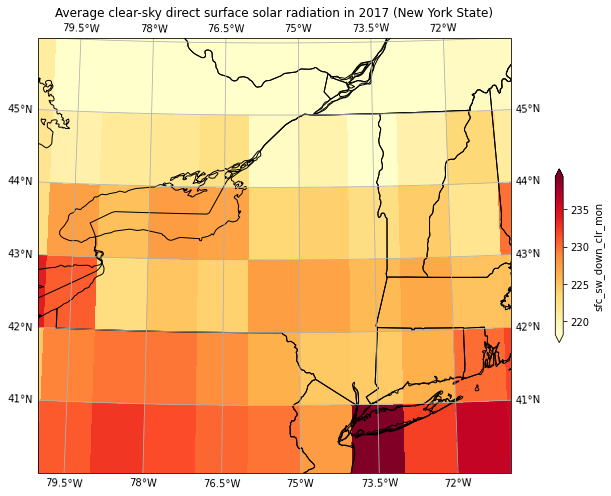

In [164]:
extent = [-80,-71, 40,46]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
ax.set_extent(extent)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

ds_NY=ds_sfcrad_mean.sel(lat=slice(40,45),lon=slice(280,290))
ds_sfcrad_mean.plot(ax=ax,cmap='YlOrRd',vmin=np.min(ds_NY.values),vmax=np.max(ds_NY.values),transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.4})
plt.title('Average clear-sky direct surface solar radiation in 2017 (New York State)')

In [181]:
#Get the PM2.5 data in New York State in 2017 from github
raw_url='https://raw.githubusercontent.com/dy2395/rces-final-project/master/NY_PM2.5_Daily_2017.csv'
of=fsspec.open(raw_url)
with of as f:
    df_pm = pd.read_csv(f)

In [182]:
# Get mean PM 2.5 concentration of each site over the year
site_mean=df_pm.groupby('Site ID').mean()
site_mean

,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
Site ID,,,,,,,,,,,
360010005,2.411871,6.744245,27.758993,1.0,100.0,88209.183453,10580.0,36.0,1.0,42.642250,-73.754640
360010012,1.000000,5.802500,24.058333,1.0,100.0,88101.000000,10580.0,36.0,1.0,42.680750,-73.757330
360050080,3.000000,6.495170,26.914773,1.0,100.0,88502.000000,35620.0,36.0,5.0,40.836060,-73.920090
360050110,3.155814,6.327209,25.788372,1.0,100.0,88101.000000,35620.0,36.0,5.0,40.816000,-73.902000
360050112,3.000000,6.418879,26.601770,1.0,100.0,88502.000000,35620.0,36.0,5.0,40.815510,-73.885530
360050133,1.000000,7.970492,32.163934,1.0,100.0,88101.000000,35620.0,36.0,5.0,40.867900,-73.878090
360130006,1.000000,6.188235,25.571429,1.0,100.0,88101.000000,27460.0,36.0,13.0,42.499630,-79.318810
360290002,1.179104,6.817164,27.970149,1.0,100.0,88101.000000,15380.0,36.0,29.0,42.993280,-78.771530
360290005,2.520833,7.409167,30.418750,1.0,100.0,88405.927083,15380.0,36.0,29.0,42.876907,-78.809526


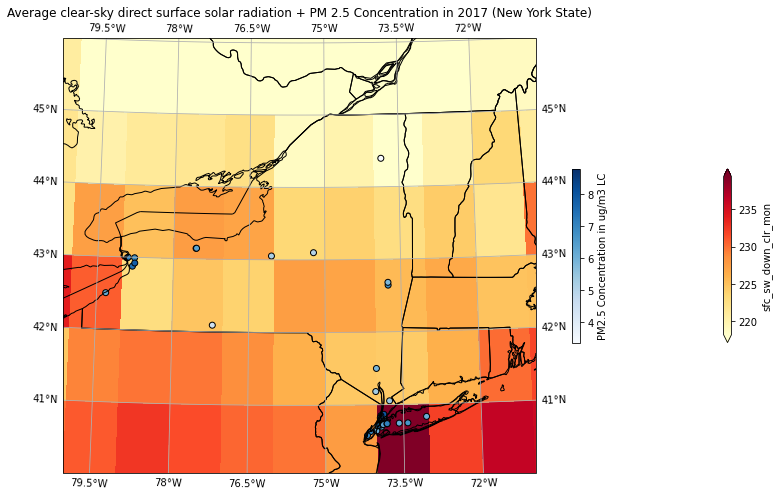

In [167]:
extent = [-80,-71, 40,46]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
ax.set_extent(extent)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

ds_NY=ds_sfcrad_mean.sel(lat=slice(40,45),lon=slice(280,290))
ds_sfcrad_mean.plot(ax=ax,cmap='YlOrRd',vmin=np.min(ds_NY.values),vmax=np.max(ds_NY.values),transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.4})
plt.title('Average clear-sky direct surface solar radiation + PM 2.5 Concentration in 2017 (New York State)')

sc=ax.scatter(site_mean.SITE_LONGITUDE,site_mean.SITE_LATITUDE,c=site_mean['Daily Mean PM2.5 Concentration'],cmap='Blues',transform=ccrs.PlateCarree(),marker='o',edgecolors='k')
plt.colorbar(sc,shrink=0.4,label='PM2.5 Concentration in ug/m3 LC')

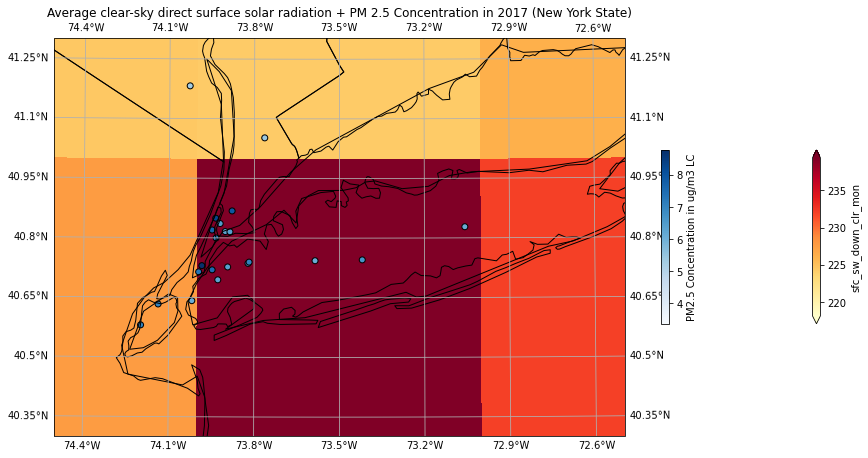

In [178]:
extent = [-74.5,-72.5, 40.3,41.3]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
ax.set_extent(extent)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

ds_NY=ds_sfcrad_mean.sel(lat=slice(40,45),lon=slice(280,290))
ds_sfcrad_mean.plot(ax=ax,cmap='YlOrRd',vmin=np.min(ds_NY.values),vmax=np.max(ds_NY.values),transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.4})
plt.title('Average clear-sky direct surface solar radiation + PM 2.5 Concentration in 2017 (New York State)')

sc=ax.scatter(site_mean.SITE_LONGITUDE,site_mean.SITE_LATITUDE,c=site_mean['Daily Mean PM2.5 Concentration'],cmap='Blues',transform=ccrs.PlateCarree(),marker='o',edgecolors='k')
plt.colorbar(sc,shrink=0.4,label='PM2.5 Concentration in ug/m3 LC')

#### PM 2.5 scatters sunlight and increase diffuse radiation but it doesn't really affect the total downward shortwave radiation (global radiation) as the diffuse light can still reach the surface.
### *** Following steps 
#### Load the direct radiation data from NREL and find the diffuse fraction for each site's location(xr.where)
#### Do a linear regression to find correlation between diffuse fractioN and pm 2.5 concentration (R is about 0.47 according to the paper)
#### Make more plots!